# Final grades prediction
_**With the usage of Linear Regression**_

Obtaining data

In [1]:
import pandas as pd
pd_data = pd.read_csv('../data/data.csv')
pd_data = pd_data.drop(pd_data.columns[0], axis=1)

Defining features

In [2]:
_features = ["Intellectual Abilities", "Hours", "Special Abilities", "Material well-being", "Final Grade"]
pd_data.columns = _features

Assigning correct types

In [3]:
pd_data = pd_data.replace(to_replace=['Yes', 'No'], value=[1, 0])
pd_data = pd_data.astype({"Intellectual Abilities": int, "Hours": int, "Special Abilities": bool, "Material well-being": int, "Final Grade": int})

Make description of data

In [4]:
pd_data.head()

,Intellectual Abilities,Hours,Special Abilities,Material well-being,Final Grade
0,2,2,False,1,4
1,2,6,True,1,1
2,1,4,True,2,2
3,2,2,True,1,1
4,1,1,True,2,2


In [30]:
pd_data.describe()

,Intellectual Abilities,Hours,Material well-being,Final Grade
count,5.000000,5.0,5.000000,5.000000
mean,1.600000,3.0,1.400000,2.000000
std,0.547723,2.0,0.547723,1.224745
min,1.000000,1.0,1.000000,1.000000
25%,1.000000,2.0,1.000000,1.000000
50%,2.000000,2.0,1.000000,2.000000
75%,2.000000,4.0,2.000000,2.000000
max,2.000000,6.0,2.000000,4.000000


Using Linear Regression


In [5]:
from sklearn.linear_model import LinearRegression
_ml_model = LinearRegression()

Defining features and target

In [6]:
X = pd_data[_features[:-1]]
y = pd_data[_features[-1]]

Splitting data into train and test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
_ml_model.fit(X_train, y_train)

LinearRegression()

Analysing results

In [9]:
_ml_model.score(X_train, y_train)

0.3341577162238555

Dependency graphs

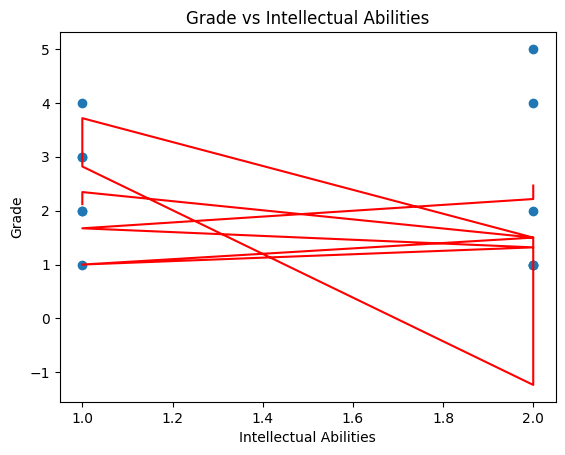

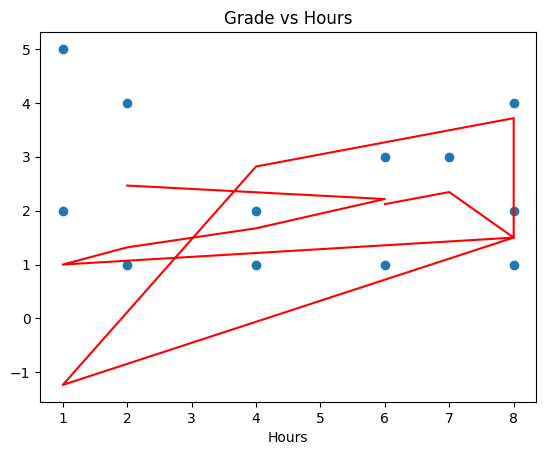

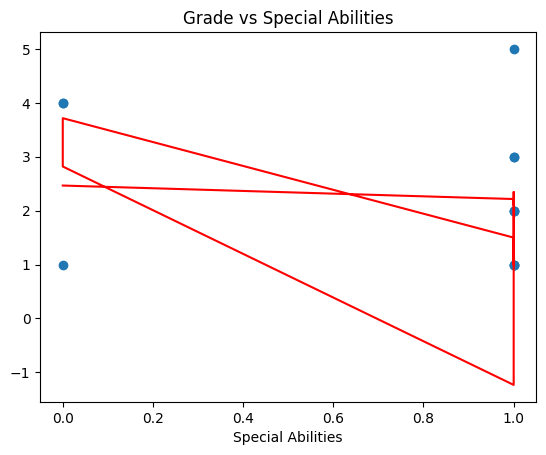

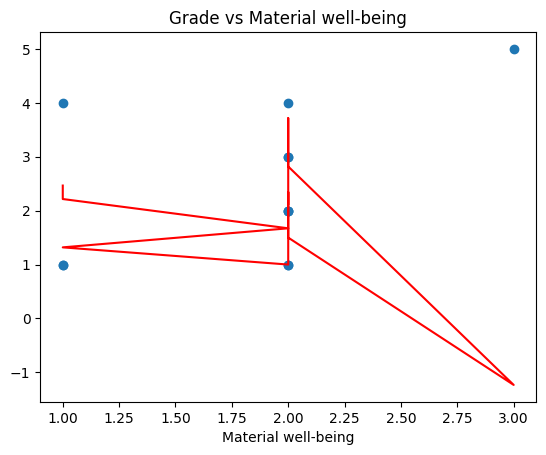

In [10]:
import matplotlib.pyplot as plt
plt.ylabel("Grade")
for feature in _features[:-1]:
    plt.title("Grade vs " + feature)
    plt.xlabel(feature)
    plt.scatter(X[feature], y)
    plt.plot(X[feature], _ml_model.predict(X), color='red')
    plt.show()

Coefficients

In [11]:
_ml_model.coef_

array([-1.06896552,  0.22413793, -1.14655172, -1.1637931 ])

Intercept

In [12]:
_ml_model.intercept_

5.318965517241379

Generate list for prediction

In [13]:
to_predict = [2, 1, 1, 1]

Execute prediction

In [14]:
_ml_model.predict(pd.DataFrame([to_predict], columns=_features[:-1]))

array([1.09482759])